In [1]:
library( "data.table")   
library(ggplot2)


In [2]:
setwd("C:/_MCD/Labo1/code")
dataset  <- fread("./datasets/comp1/competencia1_2022.csv")

## Filas y Columnas

In [3]:
nrow(dataset)
ncol(dataset)

[1] 324242

[1] 155

### Filas: 4.214.386
### Columnas: 155

In [4]:
#convierto foto_mes a caracter para los graficos
dataset[, foto_mes:=as.character(foto_mes)]

In [5]:
mesCant <- dataset[ , .N, foto_mes ]
round(mean(mesCant[,N]))
min(mesCant[,foto_mes])
max(mesCant[,foto_mes])
nrow(mesCant)

[1] 162121

[1] "202101"

[1] "202103"

[1] 2

### Clientes Promedio x mes: 145.324
### Primer mes: 201901
### Último mes (a evaluar): 202105

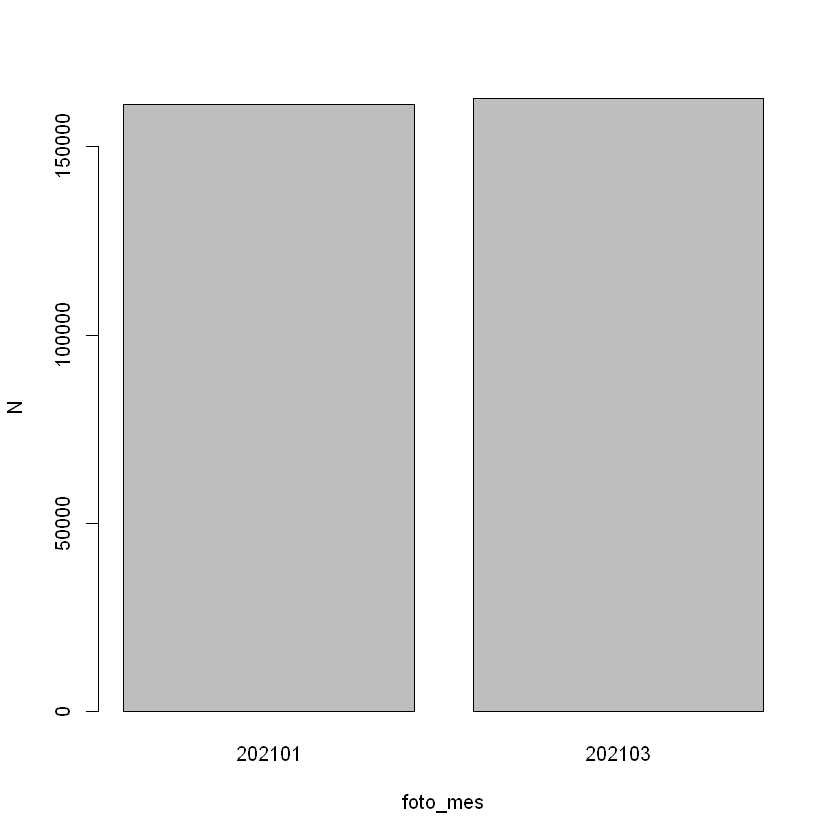

In [6]:
barplot(N ~ foto_mes,mesCant)

Se observa que mes a mes crece la cantidad de clientes

In [7]:
cantMesClase <- dataset[,.N,list(foto_mes,clase_ternaria)]

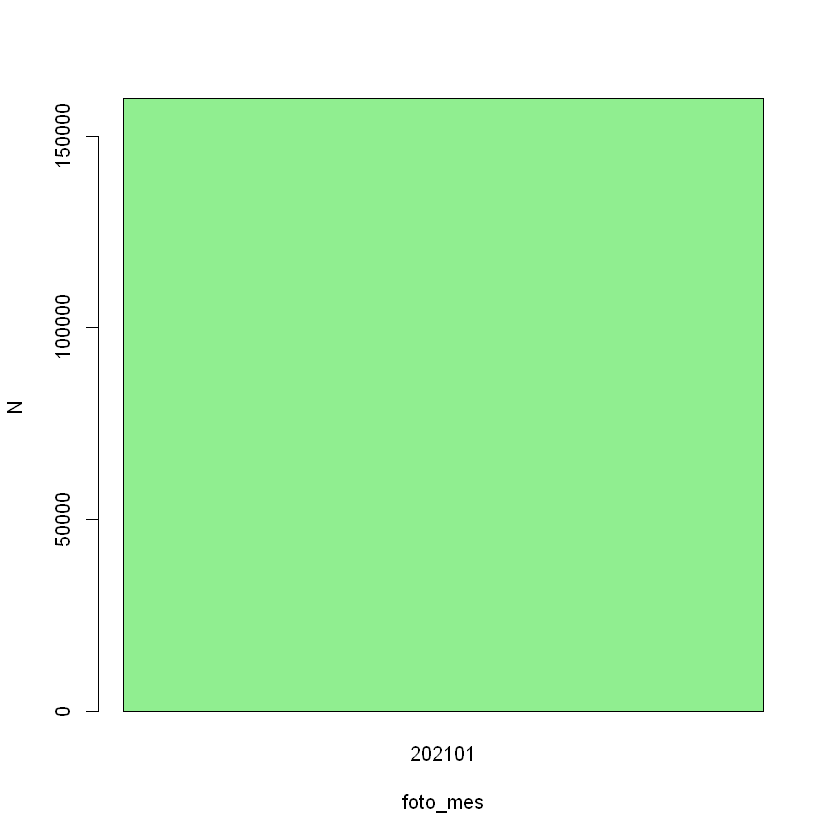

In [8]:
barplot(N ~ foto_mes,cantMesClase[clase_ternaria=="CONTINUA"],col="lightgreen")

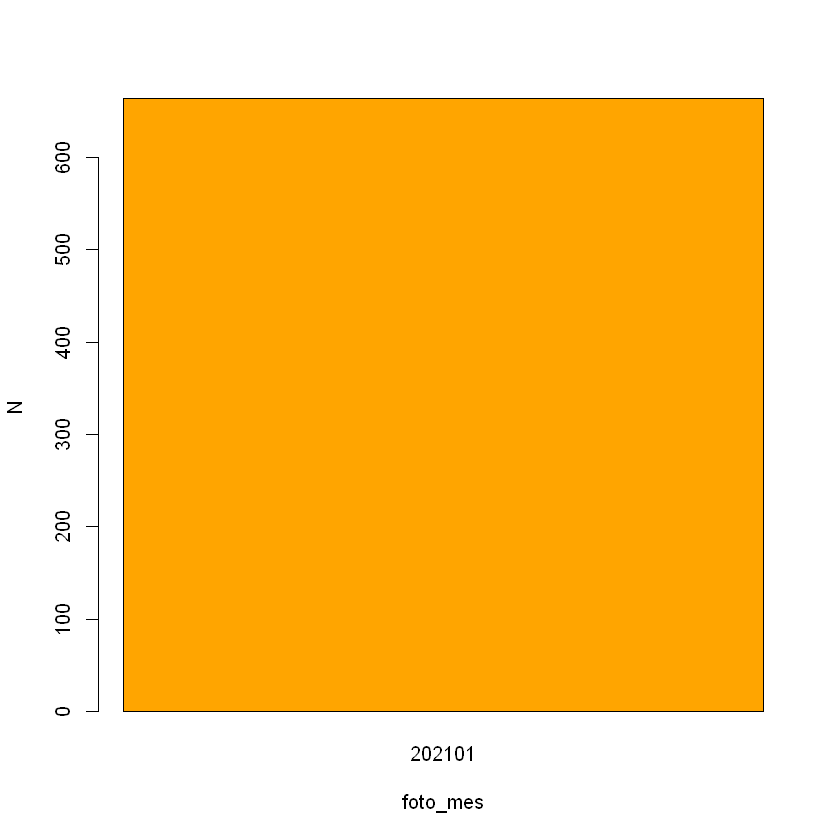

In [9]:
barplot(N ~ foto_mes,cantMesClase[clase_ternaria=="BAJA+1"],col="orange")

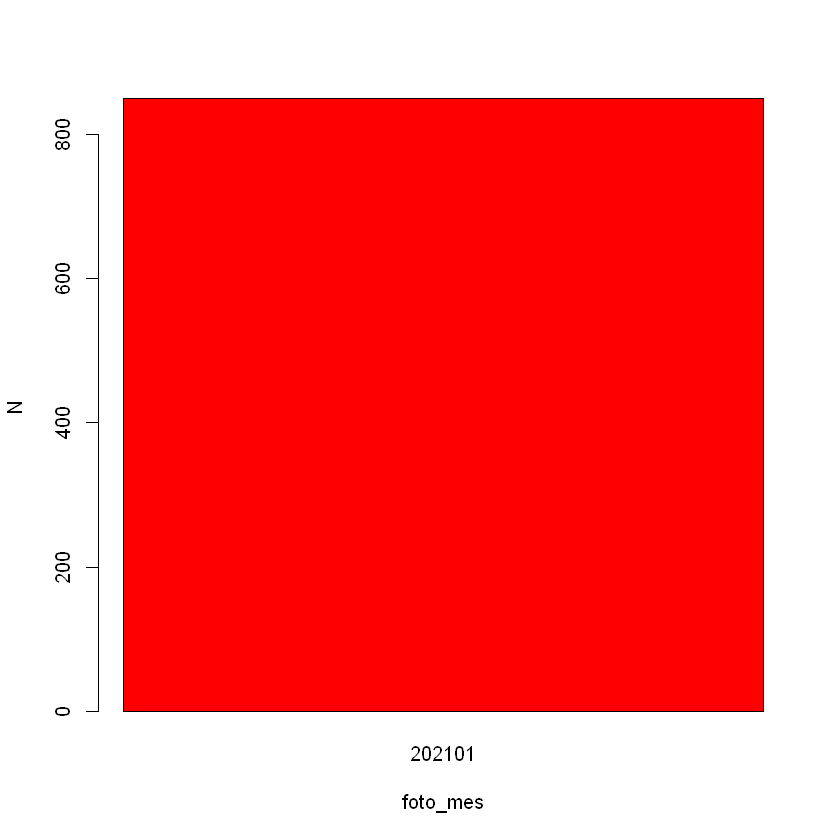

In [10]:
barplot(N ~ foto_mes,cantMesClase[clase_ternaria=="BAJA+2"],col="red")

In [11]:
#cantMesClase
cantMesClase[,clase_ternaria:=ifelse(clase_ternaria=="","NADA",clase_ternaria)]
cantMesClase[,clase_ternaria:=ifelse(clase_ternaria=="BAJA+1","BAJA_1",clase_ternaria)]
cantMesClase[,clase_ternaria:=ifelse(clase_ternaria=="BAJA+2","BAJA_2",clase_ternaria)]

aplanada <- dcast(cantMesClase, foto_mes ~ clase_ternaria, value.var="N")
aplanada[,TOTAL:=rowSums( cbind( BAJA_1,BAJA_2,CONTINUA,NADA) , na.rm=TRUE)]
aplanada[is.na(aplanada), ] <- 0   

In [12]:
aplanada[,prop_BAJA_1:=100*(BAJA_1/TOTAL)]
aplanada[,prop_BAJA_2:=100*(BAJA_2/TOTAL)]
aplanada[,prop_CONTINUA:=100*(CONTINUA/TOTAL)]
aplanada[,prop_NADA:=100*(NADA/TOTAL)]

aplanada

foto_mes,BAJA_1,BAJA_2,CONTINUA,NADA,TOTAL,prop_BAJA_1,prop_BAJA_2,prop_CONTINUA,prop_NADA
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
202101,664,850,159828,0,161342,0.4115481,0.5268312,99.06162,0
202103,0,0,0,162900,162900,0.0000000,0.0000000,0.00000,100


### Mes 202105 sin datos sobre ternaria
### Mes 202104 solamente con datos BAJA+1